In [23]:
#Cell_1.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

rand1 = np.random.binomial(n=20, p=0.5, size=1)
print(rand1)

[11]


In [44]:
#Cell_2.
from scipy.stats import binomtest

result = binomtest(11, n=20, p=0.5)
p=result.pvalue
print(p)
if(p<0.05):
    print("帰無仮説棄却")
else:
    print("帰無仮説棄却できない")

0.8238029479980469
帰無仮説棄却できない


In [25]:
#Cell_3.
#P=0.6のもとで表が15回以上または5回以下の確率
ans1=ss.binom.pmf(0,20,0.6)+ss.binom.pmf(1,20,0.6)+ss.binom.pmf(2,20,0.6)+ss.binom.pmf(3,20,0.6)+ss.binom.pmf(4,20,0.6)+ss.binom.pmf(5,20,0.6)
ans2=(ss.binom.pmf(15,20,0.6)+ss.binom.pmf(16,20,0.6)+ss.binom.pmf(17,20,0.6)+ss.binom.pmf(18,20,0.6)+ss.binom.pmf(19,20,0.6)+ss.binom.pmf(20,20,0.6))
print(ans1)
print(ans2)
print(ans1+ans2)

0.0016115246434562885
0.1255989727230376
0.1272104973664939


In [26]:
#Cell_4.
l = [i for i in range(10,21)]  
dist = {}
for x in l:
    dist[x] = x#dist.get(x,0)+1

for i in dist.keys():
    result = binomtest(i, n=20, p=0.5)
    p=result.pvalue
    dist[i] = p
print(dist)

{10: 1.0, 11: 0.8238029479980469, 12: 0.5034446716308594, 13: 0.26317596435546875, 14: 0.11531829833984375, 15: 0.04138946533203125, 16: 0.01181793212890625, 17: 0.0025768280029296875, 18: 0.0004024505615234375, 19: 4.00543212890625e-05, 20: 1.9073486328125e-06}


In [53]:
# p=0.5のもとで、帰無仮説が棄却される（つまりp値が0.05未満となる）のはどこか？

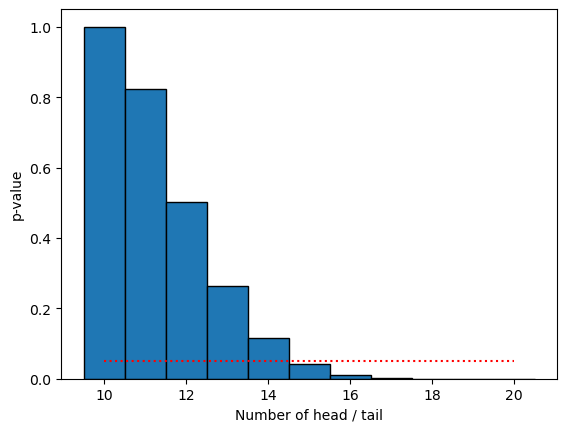

In [27]:
#Cell_5.
plt.bar(dist.keys(), dist.values(), width=1, ec='black' )
plt.xlabel("Number of head / tail")
plt.ylabel("p-value")
plt.hlines(0.05, 10, 20, color='r', linestyles='dotted')
plt.show()

In [28]:
#Cell_6.
#両側検定なので、上側2.5%より上が棄却域。ただし二項分布は離散型なので、+1する。
#コイントスする回数
N=20
#その時の棄却域
th = ss.binom.ppf(0.975,N,0.5)+1
print(th)

15.0


In [ ]:
# 上の図から、表または裏が15回以上出ると、p=0.5という仮説（帰無仮説）は棄却される。（赤線が有意水準）

In [ ]:
#よってこの検定では、20回コイントスして、15回以上表または裏が出ると、帰無仮説が棄却される。

In [ ]:
#では真実としてp=0.6であったら？この場合は、p=0.5ではないですから、"p=0.5"という帰無仮説は棄却されてしかるべき。
#帰無仮説が”ちゃんと”棄却される確率は、どの程度か？

In [29]:
#Cell_7.
#まずは帰無仮説"p=0.5"のもとで、仮説検定(二項検定の両側検定)を1回やってみよう
#まずはコイントスを20回やる。真実のp=0.6です。
rand1 = np.random.binomial(n=20, p=0.6, size=1)
print(rand1)
#仮説検定します。帰無仮説はp=0.5です。
result = binomtest(rand1[0], n=20, p=0.5)
p=result.pvalue

print(p)
if(p<0.05):
    print("帰無仮説棄却")
else:
    print("帰無仮説棄却できない")
    
#このセルを何回も実行してみて下さい。どの程度"帰無仮説棄却"と出ますか？

[15]
0.04138946533203125
帰無仮説棄却


In [31]:
#Cell_8.
#意外と棄却できないことが多いと思います。
#for文を用いて10000回やってみましょう
#棄却できた回数
reject=0
for i in range(10000):
    rand1 = np.random.binomial(n=20, p=0.6, size=1)
    #仮説検定します。帰無仮説はp=0.5です。
    result = binomtest(rand1[0], n=20, p=0.5)
    p=result.pvalue
    
    if(p<0.05):
        reject +=1

#棄却できた回数と、その割合
print(reject)
print(reject/10000)

1264
0.1264


In [100]:
#上記の割合の値が検出力（誤った帰無仮説をちゃんと棄却できる確率）。今回の場合、理論的には約0.127強です。
#以外と値が大きくないのはp=0.6という値が帰無仮説と余り大きく乖離していないため。

In [32]:
#Cell_9.
#この場合における検出力の理論値を求める
ans1=ss.binom.pmf(0,20,0.6)+ss.binom.pmf(1,20,0.6)+ss.binom.pmf(2,20,0.6)+ss.binom.pmf(3,20,0.6)+ss.binom.pmf(4,20,0.6)+ss.binom.pmf(5,20,0.6)
ans2=(ss.binom.pmf(15,20,0.6)+ss.binom.pmf(16,20,0.6)+ss.binom.pmf(17,20,0.6)+ss.binom.pmf(18,20,0.6)+ss.binom.pmf(19,20,0.6)+ss.binom.pmf(20,20,0.6))
print(ans1)
print(ans2)
print(ans1+ans2)

0.0016115246434562885
0.1255989727230376
0.1272104973664939


In [33]:
#Cell_9'.
th=15
N=20
power = ss.binom.cdf((N-th),N,0.6) + (1- ss.binom.cdf(th-1,N,0.6) )
print(power)

0.12721049736649373


In [35]:
#Cell_10.
#もしp=0.8のコイン（表が80%の確率で出るコイン）だったら？
#for文を用いて10000回やってみましょう
#棄却できた回数
reject=0
for i in range(10000):
    rand1 = np.random.binomial(n=20, p=0.8, size=1)
    #仮説検定します。帰無仮説はp=0.5です。
    result = binomtest(rand1[0], n=20, p=0.5)
    p=result.pvalue
    if(p<0.05):
        reject +=1

#棄却できた回数と、その割合
print(reject)
print(reject/10000)

8057
0.8057


In [109]:
#今回は、検出力（誤った帰無仮説をちゃんと棄却できる確率）が0.8程度になったと思います。

In [36]:
#Cell_11.
th=15
N=20
power = ss.binom.cdf((N-th),N,0.8) + (1- ss.binom.cdf(th-1,N,0.8) )
print(power)

0.8042079657359469


In [37]:
#Cell_12.
#真の表が出る確率の値に関して、検出力はどう変化するのか？これを検出力関数と呼ぶ。
th=15
N=20

l = [i*0.1 for i in range(0,11)]  
dist_2 = {}
for x in l:
    dist_2[x] = x

for i in dist_2.keys():
    power = ss.binom.cdf((N-th),N,i) + (1- ss.binom.cdf(th-1,N,i) )
    dist_2[i] = power

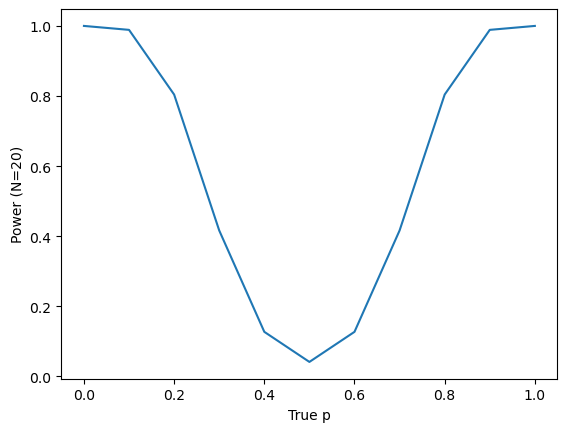

In [38]:
#Cell_13.
plt.plot(dist_2.keys(), dist_2.values())
plt.xlabel("True p")
plt.ylabel("Power (N=20)")
plt.show()

In [110]:
#p=0.6でも、コイントスの回数を増やせば、検出力を高めることができます。

In [39]:
#Cell_14.
#コイントスする回数
N=200
#その時の棄却域
th = ss.binom.ppf(0.975,N,0.5)+1
print(th)
power = ss.binom.cdf((N-th),N,0.6) + (1- ss.binom.cdf(th-1,N,0.6) )
print(power)

115.0
0.7868482653076213


In [40]:
#Cell_15.
#サンプルサイズに関して、検出力はどう変化するのか？
l = [i for i in range(10,300)]  
dist_3 = {}
for x in l:
    dist_3[x] = x

for i in dist_3.keys():
    th = ss.binom.ppf(0.975,i,0.5)+1
    power = ss.binom.cdf((i-th),i,0.6) + (1- ss.binom.cdf(th-1,i,0.6) )
    dist_3[i] = power

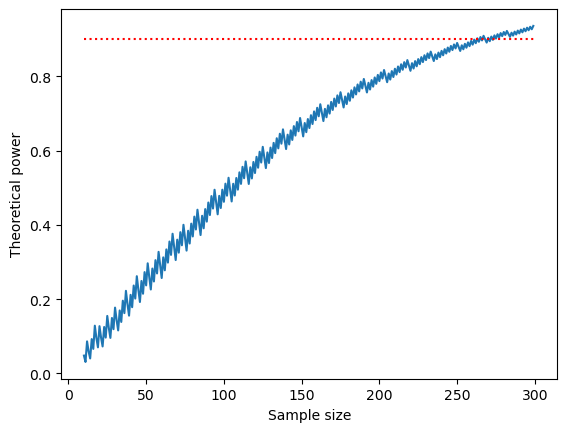

In [41]:
#Cell_16.
plt.plot(dist_3.keys(), dist_3.values())
plt.xlabel("Sample size")
plt.ylabel("Theoretical power")
plt.hlines(0.9, 10, 300, color='r', linestyles='dotted')
plt.show()

In [42]:
#Cell_17.
print(dist_3)

{10: 0.048035123200000016, 11: 0.03096709120000002, 12: 0.08625350656, 13: 0.059217743872, 14: 0.040400258498560035, 15: 0.09242967162879999, 16: 0.06608519210598401, 17: 0.12852048786227194, 18: 0.09544803356901374, 19: 0.07025436257812477, 20: 0.12721049736649373, 21: 0.09657499344157276, 22: 0.0726534168304578, 23: 0.12498185737126223, 24: 0.09650110968838181, 25: 0.1547571752585144, 26: 0.1222077493352226, 27: 0.09563480714533754, 28: 0.14924001809175066, 29: 0.11910630164842102, 30: 0.17714287669973774, 31: 0.14385229472424982, 32: 0.11581384547867854, 33: 0.16951042053394189, 34: 0.13861448759134384, 35: 0.19576632051972845, 36: 0.1623425385181905, 37: 0.22235196309299435, 38: 0.18673558099215554, 39: 0.15558238064058352, 40: 0.21156258883841686, 41: 0.17833250846340676, 42: 0.23662301096781732, 43: 0.201589011943878, 44: 0.26174481052842974, 45: 0.22517414782316453, 46: 0.192316635768706, 47: 0.24893134702532513, 48: 0.21455814973738652, 49: 0.2727241255680961, 50: 0.23705687849

In [43]:
#Cell_18.
# Simulation.
l = [i for i in range(10,300)]  
dist_4 = {}
for x in l:
    dist_4[x] = x

for i in dist_4.keys():
    reject=0
    
    for j in range(1000):
        rand1 = np.random.binomial(n=i, p=0.6, size=1)
#        p = ss.binom_test(rand1,i,0.5)
        result = binomtest(rand1[0], n=i, p=0.5)
        p=result.pvalue        
        if(p<0.05):
            reject +=1
    power = reject / 1000
    dist_4[i] = power

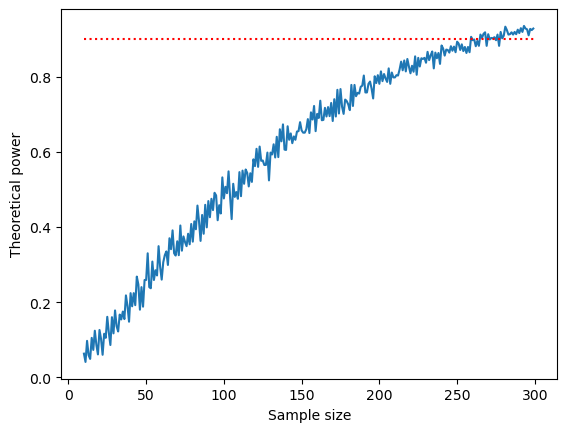

In [210]:
#Cell_19.
plt.plot(dist_4.keys(), dist_4.values())
plt.xlabel("Sample size")
plt.ylabel("Theoretical power")
plt.hlines(0.9, 10, 300, color='r', linestyles='dotted')
plt.show()